In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 多元正态分布
# multivariate_normal API参考链接：https://docs.scipy.org/doc/numpy-dev/genindex.html
# multivariate_normal API参考链接：http://scipy.github.io/devdocs/
# multivariate_normal API参考链接：http://scipy.github.io/devdocs/stats.html
# multivariate_normal API参考链接：http://scipy.github.io/devdocs/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
from scipy.stats import multivariate_normal#多元正态分布
from sklearn.mixture import GaussianMixture#GMM Gaussian Mixture Model
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
# 解决中文显示问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 设置在jupyter中matplotlib的显示情况（默认inline是内嵌显示，通过设置为tk表示不内嵌显示）
# %matplotlib tk

In [4]:
'''
sklearn.mixture.GaussianMixture在0.18版本以前是sklearn.mixture.GMM，两者的参数基本类型，这里主要介绍GaussianMixture的相关参数
属性参数：
n_components：混合组合的个数，默认为1, 可以理解为聚类/分类数量
covariance_type：给定协方差的类型，可选: full、tied、diag、spherical，默认为full；full：每个组件都有自己的公用的协防差矩阵，tied：所有组件
公用一个协方差矩阵，diag：每个组件都有自己的斜对角协方差矩阵，spherical：每个组件都有自己单独的方差值
tol：默认1e-3，收敛阈值，如果在迭代过程中，平均增益小于该值的时候，EM算法结束。
reg_covar：协方差对角线上的非负正则化参数，默认为0
max_iter：em算法的最大迭代次数，默认100
n_init: 默认值1，执行初始化操作数量，该参数最好不要变动
init_params：初始化权重值、均值以及精度的方法，参数可选：kmeans、random，默认kmeans；kmeans：使用kmeans算法进行初始化操作
weights_init：初始化权重列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
means_init：初始化均值列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
precisions_init: 初始化精度列表，如果没有给定，那么使用init_params参数给定的方法来进行创建，默认为None
warn_stat：默认为False，当该值为true的时候，在类似问题被多次训练的时候，可以加快收敛速度
'''
## 使用scikit携带的EM算法或者自己实现的EM算法
def trainModel(style, x):
    if style == 'sklearn':
        print("sklearn")
        # 对象创建
        g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000, init_params='kmeans')
        # 模型训练
        g.fit(x)
        # 效果输出
        print('类别概率:\t', g.weights_)
        print('均值:\n', g.means_, '\n')
        print('方差:\n', g.covariances_, '\n')
        print('似然函数的值:\n', g.lower_bound_)
        p1,p2 =g.weights_
        mu1, mu2 = g.means_
        sigma1, sigma2 = g.covariances_
        # 返回数据
        return (p1,p2, mu1, mu2, sigma1, sigma2)
    else:
        ## 自己实现一个EM算法
        num_iter = 100
        n, d = data.shape
        
        # 初始化均值和方差正定矩阵(sigma叫做协方差矩阵)
        mu1 = data.min(axis=0)
        mu2 = data.max(axis=0)
        sigma1 = np.identity(d)
        sigma2 = np.identity(d)
        pi = 0.5
        print("随机初始的期望为:")
        print(mu1)
        print(mu2)
        print("随机初始的方差为:")
        print(sigma1)
        print(sigma2)
        print("随机初始的π为:")
        print([pi, 1-pi])
        
        # 实现EM算法
        for i in range(num_iter):
            # E Step
            # 1. 计算获得多元高斯分布的概率密度函数
            norm1 = multivariate_normal(mu1, sigma1)
            norm2 = multivariate_normal(mu2, sigma2)
            # 2. 计算概率值
            tau1 = pi * norm1.pdf(data)
            tau2 = (1 - pi) * norm2.pdf(data)
            # 3. 概率值均一化（即公式中的w）
            gamma = tau1 / (tau1 + tau2)
            
            # M Step
            # 1. 计算更新后的均值
            mu1 = np.dot(gamma, data) / np.sum(gamma)
            mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
            # 2. 计算更新后的方差
            sigma1 = np.dot(gamma * (data - mu1).T, data - mu1) / np.sum(gamma)
            sigma2 = np.dot((1 - gamma) * (data - mu2).T, data - mu2) / np.sum(1 - gamma)
            # 3. 计算更新后的π值
            pi = np.sum(gamma) / n
            
            # 输出信息
            j = i + 1
            if j % 10 == 0:
                print (j, ":\t", mu1, mu2)
        
        # 效果输出
        print ('类别概率:\t', pi)
        print ('均值:\t', mu1, mu2)
        print ('方差:\n', sigma1, '\n\n', sigma2, '\n')
        
        # 返回结果
        return (pi, 1-pi, mu1, mu2, sigma1, sigma2)

In [5]:
# 创建模拟数据（3维数据）
np.random.seed(28)
N = 500
M = 250

## 根据给定的均值和协方差矩阵构建数据
mean1 = (0, 0, 0)
cov1 = np.diag((1, 2, 3))
## 产生400条数据
data1 = np.random.multivariate_normal(mean1, cov1, N)

## 产生一个数据分布不均衡的数据集， 100条
mean2 = (5, 5, 1)
cov2 = np.array(((3, 1, 0), (1, 3, 0), (0, 0, 3)))
data2 = np.random.multivariate_normal(mean2, cov2, M)

## 合并data1和data2这两个数据集
data = np.vstack((data1, data2))

## 产生数据对应的y值
y1 = np.array([True] * N + [False] * M)
y2 = ~y1

In [6]:
## 预测结果(得到概率密度值)
style = 'sklearn'
#style = 'self'
pi1, pi2, mu1, mu2, sigma1, sigma2 = trainModel(style, data)
# 预测分类（根据均值和方差对原始数据进行概率密度的推测）
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
# 产生预测值
tau1 = pi1 * norm1.pdf(data)
tau2 = pi2 * norm2.pdf(data)

sklearn
类别概率:	 [0.65346727 0.34653273]
均值:
 [[ 0.01849182 -0.06196439 -0.07167405]
 [ 4.88483144  4.8504199   0.87053328]] 

方差:
 [[[ 0.95155807  0.01447114 -0.1419502 ]
  [ 0.01447114  2.13698455 -0.01896039]
  [-0.1419502  -0.01896039  2.63486589]]

 [[ 3.55091687  1.47779396 -0.33422887]
  [ 1.47779396  3.69437705 -0.03920739]
  [-0.33422887 -0.03920739  2.82076436]]] 

似然函数的值:
 -5.994155750075869


In [7]:
## 计算均值的距离，然后根据距离得到分类情况
dist = pairwise_distances_argmin([mean1, mean2], [mu1, mu2], metric='euclidean')
print ("距离:", dist)
if dist[0] == 0:
    # 第一个类别用True表示，第二个类别用False表示
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1

## 计算准备率
acc = np.mean(y1 == c1)
print (u'准确率：%.2f%%' % (100*acc))

距离: [0 1]
准确率：98.53%


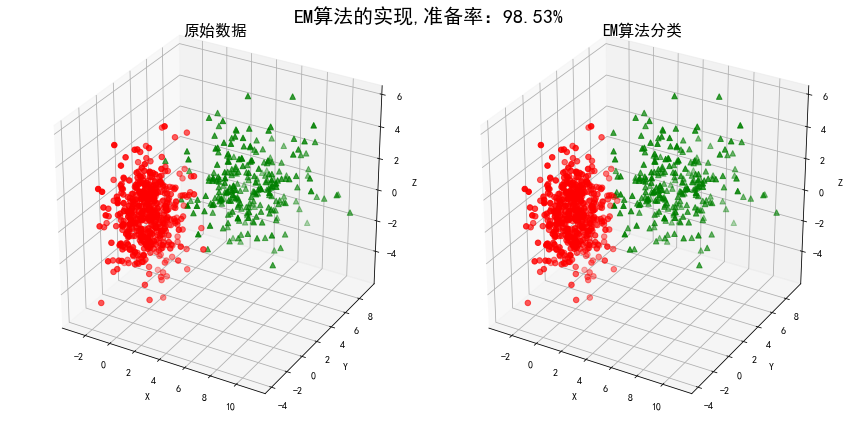

In [8]:
## 画图
fig = plt.figure(figsize=(12, 6), facecolor='w')

## 添加一个子图，设置为3d的
ax = fig.add_subplot(121, projection='3d')
## 点图
ax.scatter(data[y1, 0], data[y1, 1], data[y1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[y2, 0], data[y2, 1], data[y2, 2], c='g', s=30, marker='^', depthshade=True)
## 标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
## 标题
ax.set_title(u'原始数据', fontsize=16)

## 添加一个子图，设置为3d
ax = fig.add_subplot(122, projection='3d')
# 画点
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 设置标题
ax.set_title(u'EM算法分类', fontsize=16)

# 设置总标题
plt.suptitle(u'EM算法的实现,准确率：%.2f%%' % (acc * 100), fontsize=20)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()